In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data=yf.download('^GDAXI', start='1988-01-04', end='2024-06-13')

[*********************100%%**********************]  1 of 1 completed


In [38]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0
1988-01-08,1026.689941,1026.689941,1026.689941,1026.689941,1026.689941,0
...,...,...,...,...,...,...
2024-06-06,18576.580078,18784.650391,18576.580078,18652.669922,18652.669922,60878800
2024-06-07,18649.080078,18649.080078,18424.599609,18557.269531,18557.269531,61383200
2024-06-10,18550.330078,18550.330078,18359.419922,18494.890625,18494.890625,53451600


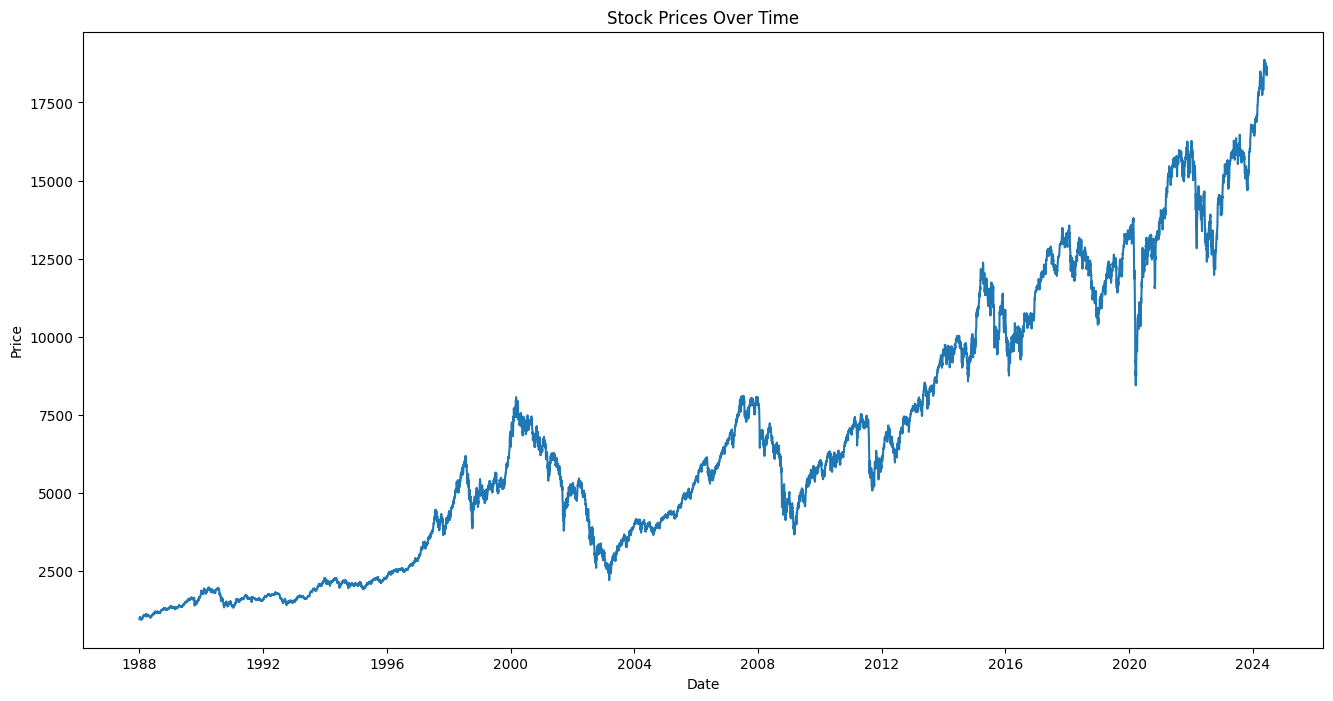

In [39]:
#visualizza the historical stock prices
plt.figure(figsize=(16, 8))
plt.plot(data['Adj Close'])#plotting the adjusted closing price
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [40]:
df=data.reset_index() #le date divebntano una colonna regolare del dataframe
df=df[['Date','Close']] #seleziono solo le colonne che mi interessano
df=df.rename(columns={'Date':'ds','Close':'y'}) #rinomino le colonne per usare il modello prophet

In [27]:
!pip install prophet

In [41]:
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [42]:
m=Prophet()

In [43]:
m.fit(df)

12:26:58 - cmdstanpy - INFO - Chain [1] start processing
12:27:01 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
futuro = m.make_future_dataframe(periods=365) #aggiungo 365 giorni al mio dataframe

In [52]:
forecast=m.predict(futuro)

In [53]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-04,1031.252002,236.801497,1952.167960,1031.252002,1031.252002,87.334421,87.334421,87.334421,14.509235,14.509235,14.509235,72.825186,72.825186,72.825186,0.0,0.0,0.0,1118.586423
1,1988-01-05,1031.954517,263.322411,1906.915828,1031.954517,1031.954517,92.571981,92.571981,92.571981,16.501217,16.501217,16.501217,76.070764,76.070764,76.070764,0.0,0.0,0.0,1124.526498
2,1988-01-06,1032.657032,313.235543,1925.594663,1032.657032,1032.657032,98.428534,98.428534,98.428534,19.662210,19.662210,19.662210,78.766324,78.766324,78.766324,0.0,0.0,0.0,1131.085566
3,1988-01-07,1033.359546,280.502093,1914.736440,1033.359546,1033.359546,98.903325,98.903325,98.903325,18.009294,18.009294,18.009294,80.894031,80.894031,80.894031,0.0,0.0,0.0,1132.262871
4,1988-01-08,1034.062061,287.165482,1962.608865,1034.062061,1034.062061,95.911210,95.911210,95.911210,13.464836,13.464836,13.464836,82.446374,82.446374,82.446374,0.0,0.0,0.0,1129.973271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9575,2025-06-08,16875.742524,16029.222846,17956.249561,16585.401654,17226.615736,131.767975,131.767975,131.767975,-41.073413,-41.073413,-41.073413,172.841388,172.841388,172.841388,0.0,0.0,0.0,17007.510499
9576,2025-06-09,16877.626526,16098.752118,17991.018984,16589.558149,17230.315425,180.706080,180.706080,180.706080,14.509235,14.509235,14.509235,166.196844,166.196844,166.196844,0.0,0.0,0.0,17058.332605
9577,2025-06-10,16879.510528,16126.117105,17948.463586,16588.737908,17234.015113,175.420524,175.420524,175.420524,16.501217,16.501217,16.501217,158.919307,158.919307,158.919307,0.0,0.0,0.0,17054.931052
9578,2025-06-11,16881.394530,16103.430675,18078.105214,16587.820762,17237.714801,170.738565,170.738565,170.738565,19.662210,19.662210,19.662210,151.076355,151.076355,151.076355,0.0,0.0,0.0,17052.133094


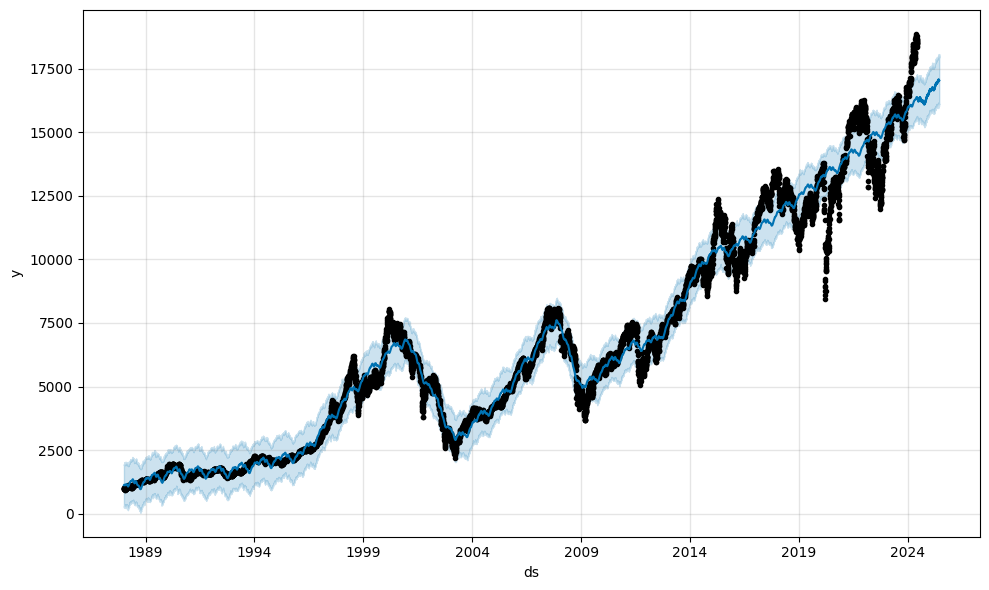

In [54]:
fig1 = m.plot(forecast)

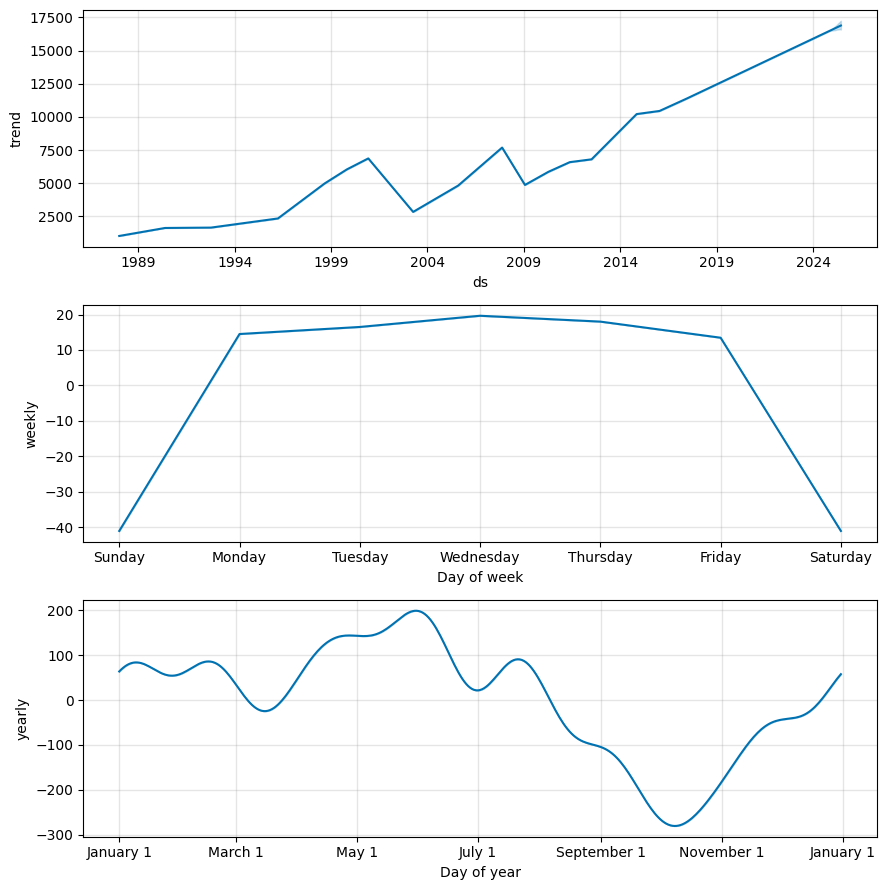

In [55]:
fig2=m.plot_components(forecast)

In [59]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv=cross_validation(m, horizon='365 days', parallel="processes")
df_p=performance_metrics(df_cv, rolling_window=1)

In [57]:
df_p['rmse'].values[0]#sta sbagliando di 21 unita

1401.655778429007